In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
dataset = pd.read_csv("aug_train.csv")
print(dataset)

       enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience   

In [3]:
dataset.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [4]:
dataset.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [5]:
for col in dataset.columns:
    print(col)

enrollee_id
city
city_development_index
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job
training_hours
target


In [6]:
print(dataset.groupby('target').size())

target
0.0    14381
1.0     4777
dtype: int64


In [7]:
dataset.isnull()

enrollee_id   city  city_development_index  gender  \
0            False  False                   False   False   
1            False  False                   False   False   
2            False  False                   False    True   
3            False  False                   False    True   
4            False  False                   False   False   
...            ...    ...                     ...     ...   
19153        False  False                   False   False   
19154        False  False                   False   False   
19155        False  False                   False   False   
19156        False  False                   False   False   
19157        False  False                   False    True   

       relevent_experience  enrolled_university  education_level  \
0                    False                False            False   
1                    False                False            False   
2                    False                False            False   
3                    False                 True            False   
4                    False                False            False   
...                    ...                  ...              ...   
19153                False                False            False   
19154                False                False            False   
19155                False                False            False   
19156                False                False            False   
19157                False                False            False   

       major_discipline  experience  company_size  company_type  last_new_job  \
0                 False       False          True          True         False   
1                 False       False         False         False         False   
2                 False       False          True          True         False   
3                 False       False          True         False         False   
4                 False       False         False         False         False   
...                 ...         ...           ...           ...           ...   
19153             False       False          True          True         False   
19154             False       False          True          True         False   
19155             False       False         False         False         False   
19156              True       False         False         False         False   
19157              True       False          True          True         False   

       training_hours  target  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
19153           False   False  
19154           False   False  
19155           False   False  
19156           False   False  
19157           False   False  

[19158 rows x 14 columns]

In [8]:
print(dataset.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [9]:
dataset.mean()

enrollee_id               16875.358179
city_development_index        0.828848
training_hours               65.366896
target                        0.249348
dtype: float64

In [10]:
dataset.shape

(19158, 14)

# Visualisation

<AxesSubplot:>

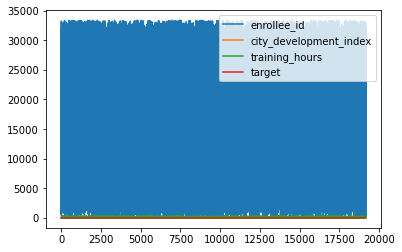

In [11]:
dataset.plot()

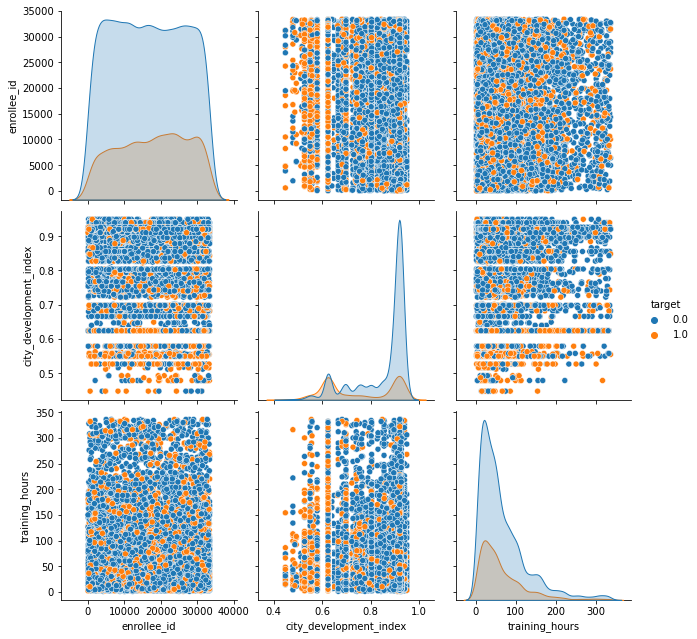

In [12]:
sns.pairplot(dataset, hue = 'target', height = 3 , aspect = 1)

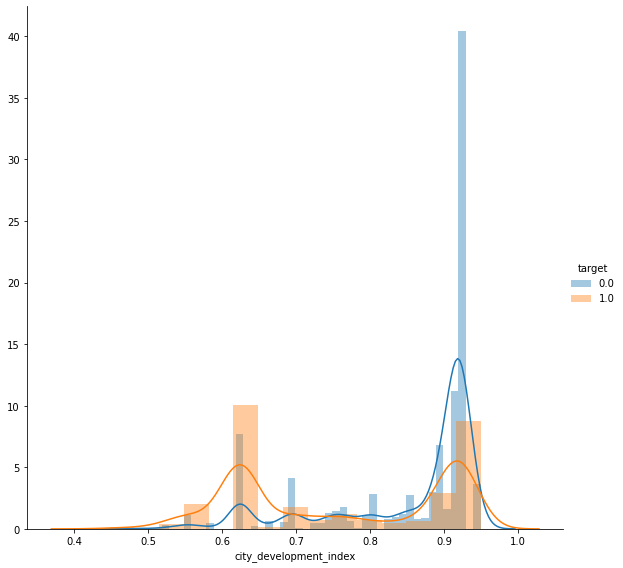

In [13]:
sns.FacetGrid(dataset,hue='target',size=8).map(sns.distplot,'city_development_index').add_legend()

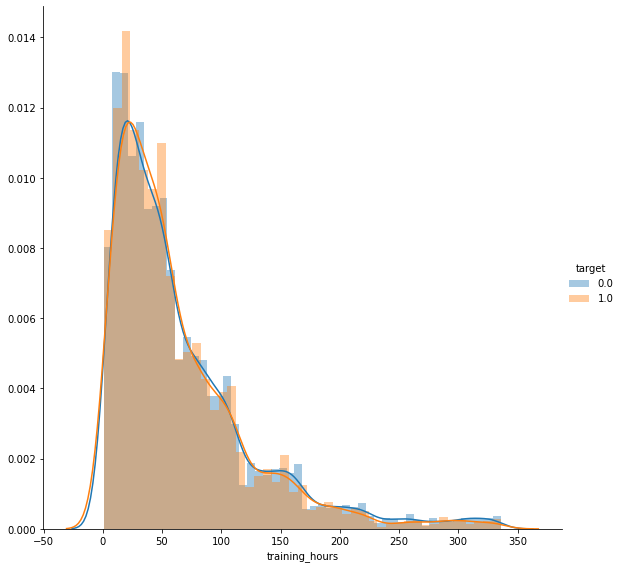

In [14]:
sns.FacetGrid(dataset,hue='target',size=8).map(sns.distplot,'training_hours').add_legend()

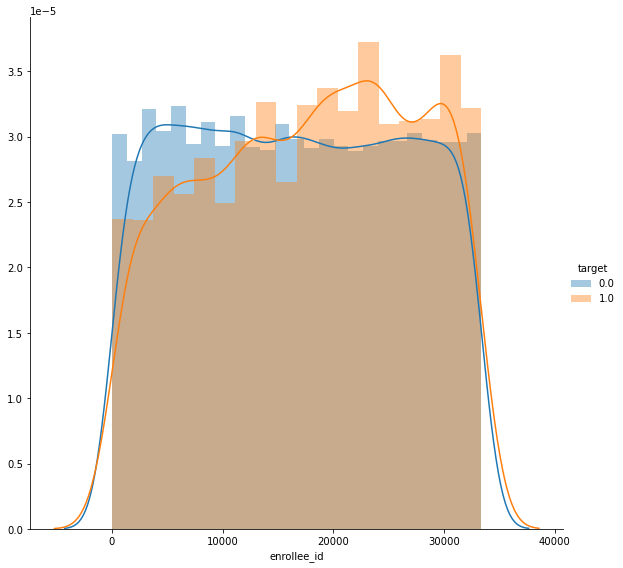

In [15]:
sns.FacetGrid(dataset,hue='target',size=8).map(sns.distplot,'enrollee_id').add_legend()

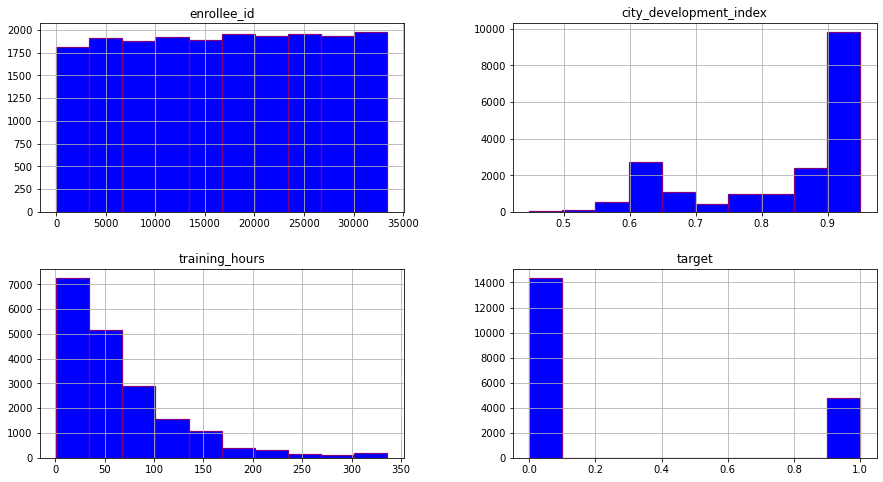

In [16]:
dataset.hist(edgecolor = 'purple', color = 'blue', linewidth = 1.2, figsize = (15, 8))
plt.show()

<AxesSubplot:xlabel='gender', ylabel='target'>

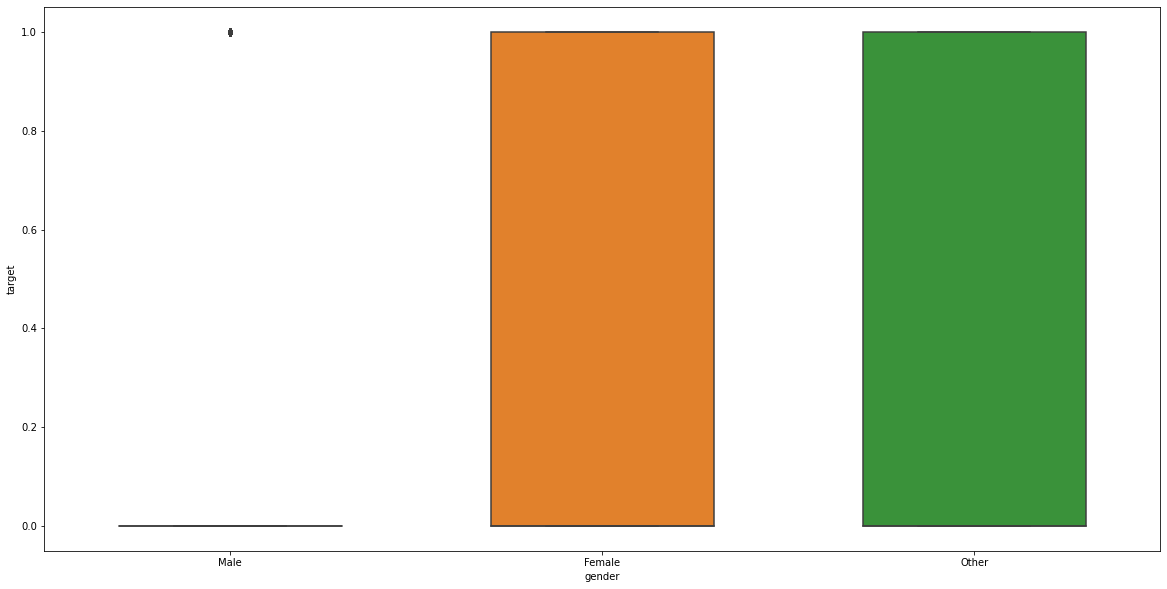

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x='gender',y='target',data=dataset, width=0.6)

<AxesSubplot:xlabel='major_discipline', ylabel='target'>

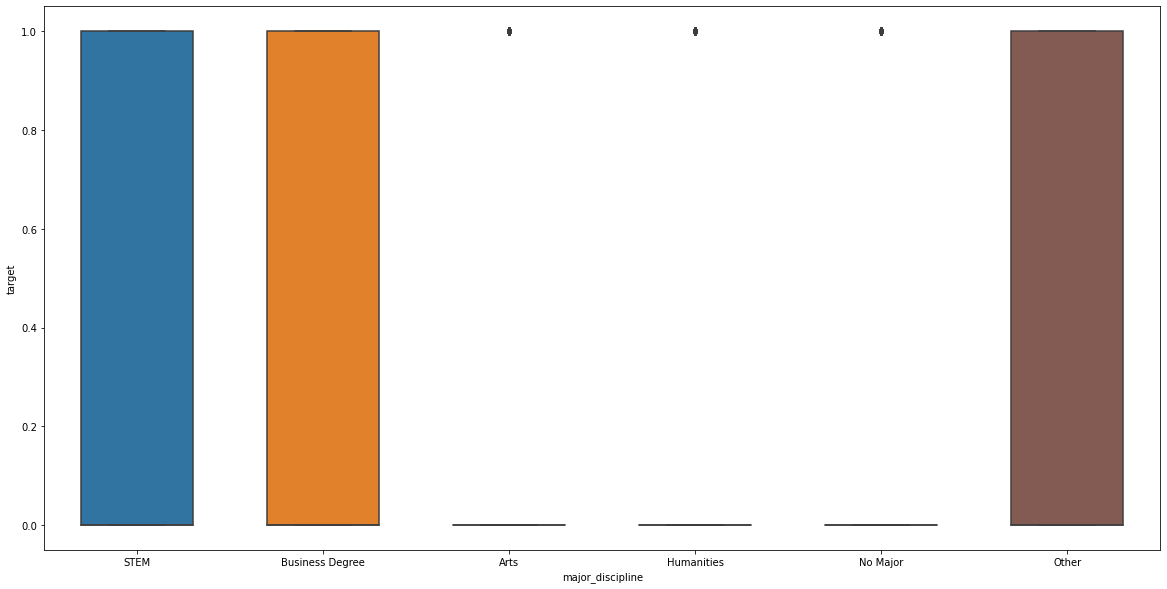

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x='major_discipline',y='target',data=dataset, width=0.6)

<AxesSubplot:xlabel='experience', ylabel='target'>

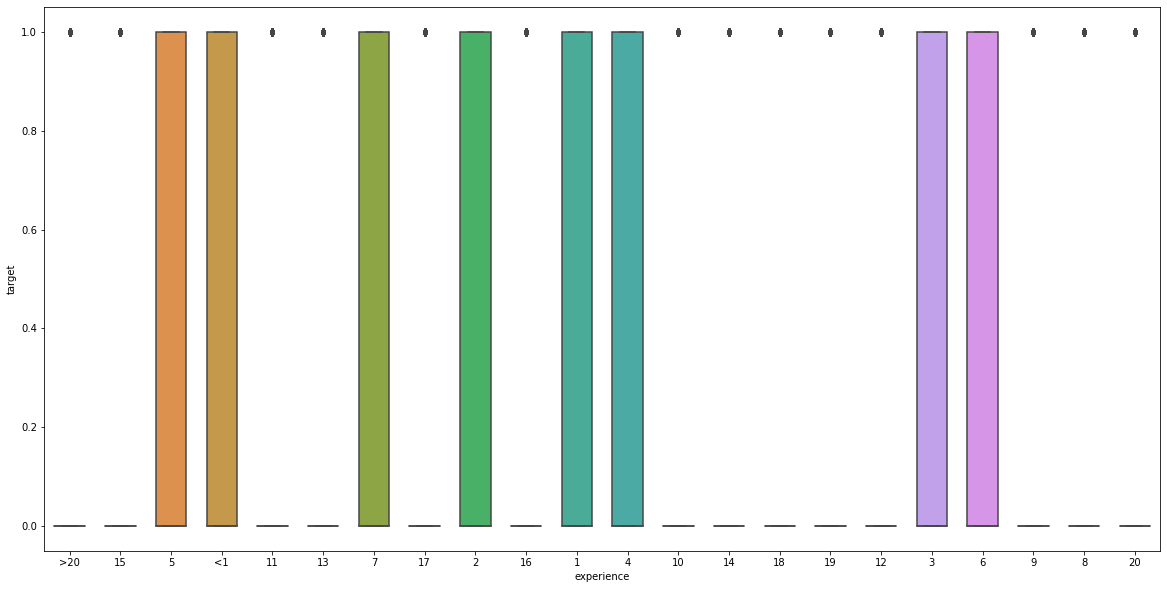

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x='experience',y='target',data=dataset, width=0.6)

<AxesSubplot:xlabel='relevent_experience', ylabel='target'>

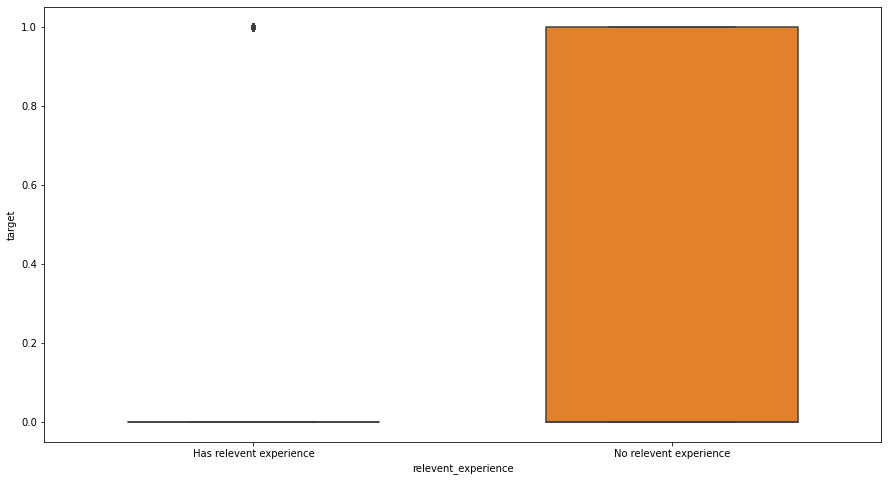

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x='relevent_experience',y='target',data=dataset, width=0.6)

<AxesSubplot:xlabel='education_level', ylabel='target'>

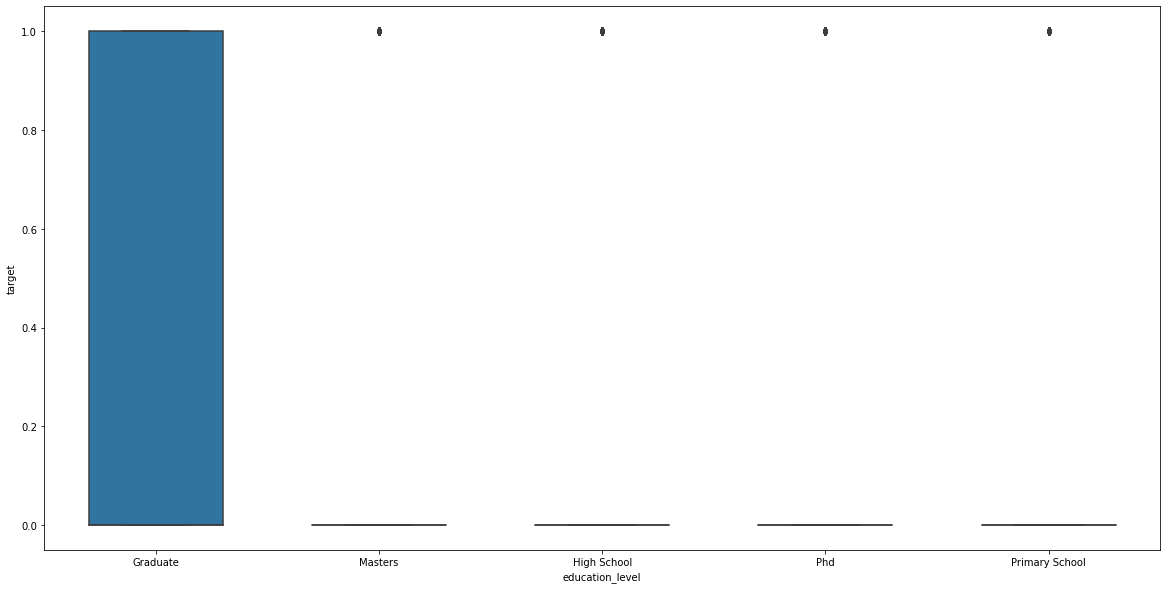

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(x='education_level',y='target',data=dataset, width=0.6)

<AxesSubplot:xlabel='enrolled_university', ylabel='target'>

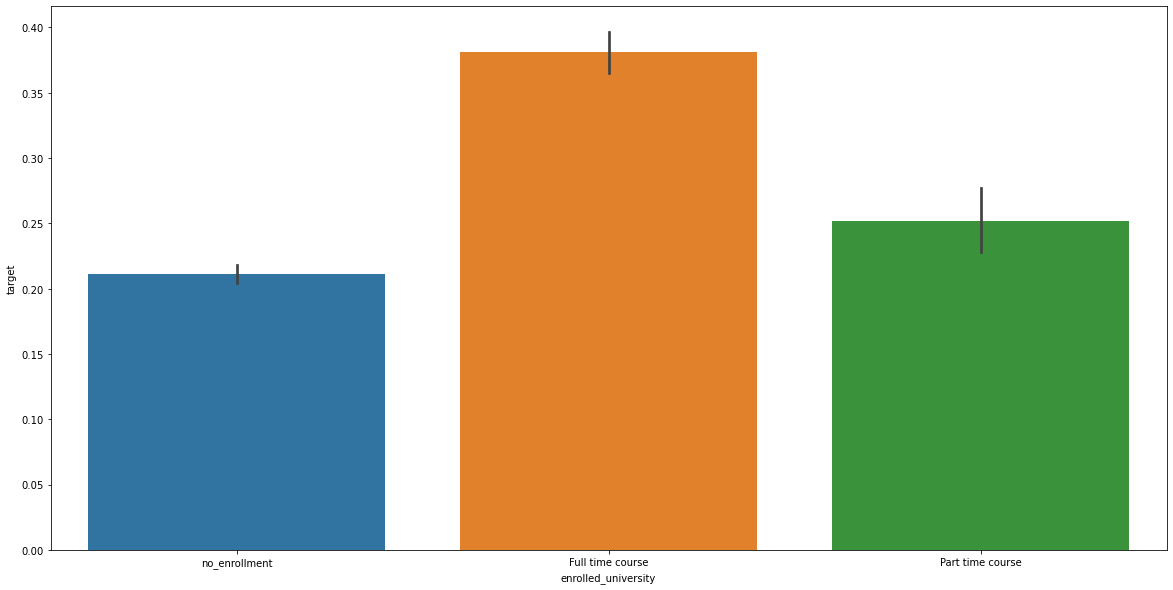

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x='enrolled_university', y='target', data=dataset)

<AxesSubplot:>

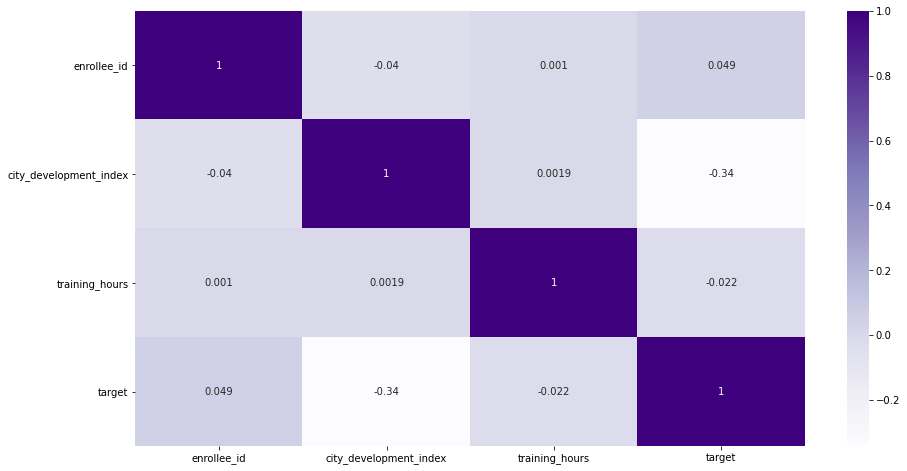

In [23]:
plt.figure(figsize=(15,8))
dataset_mx = dataset.corr()
sns.heatmap(dataset_mx, annot=True, cmap='Purples')

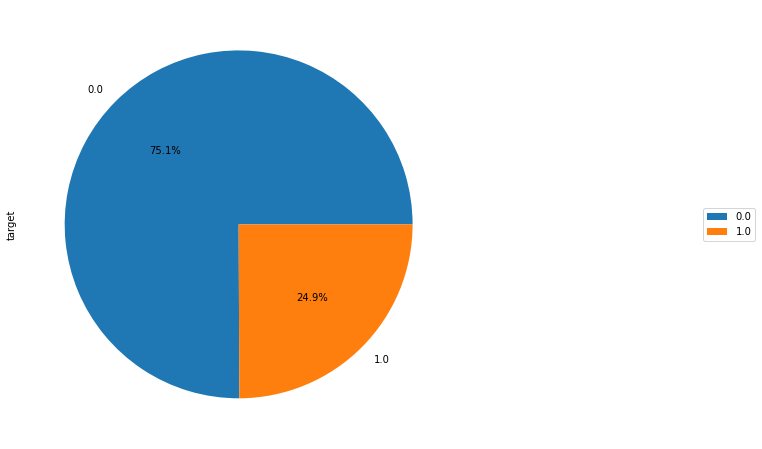

In [24]:
plt.figure(figsize=(15,8))
dataset['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc="center right", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

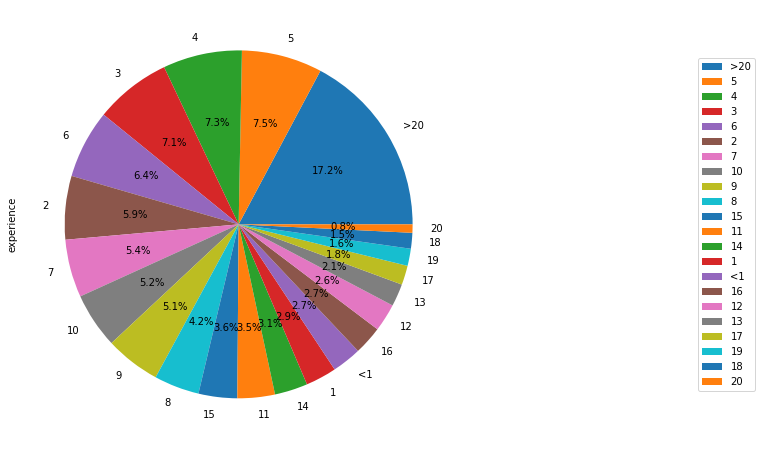

In [25]:
plt.figure(figsize=(15,8))
dataset['experience'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc="center right", bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

findfont: Font family ['TimesNewRoman'] not found. Falling back to DejaVu Sans.


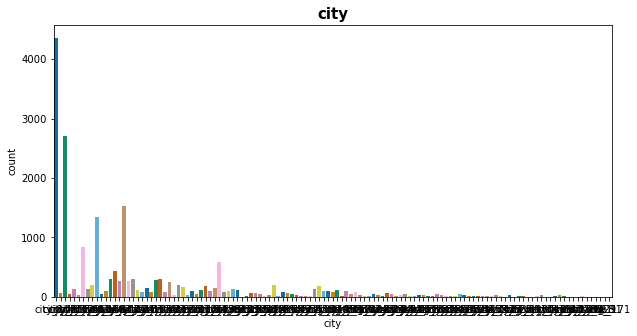

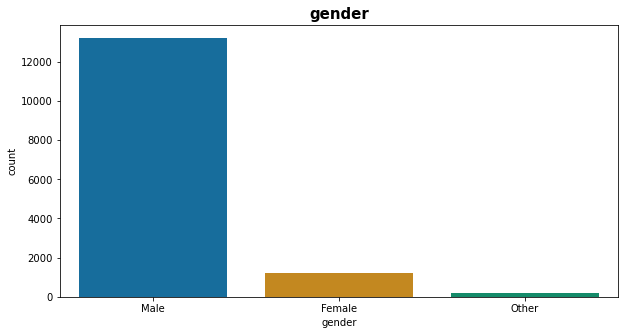

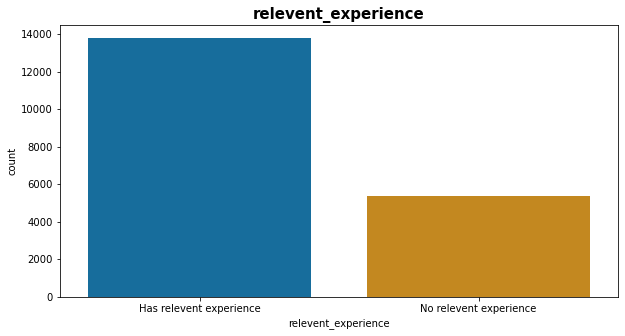

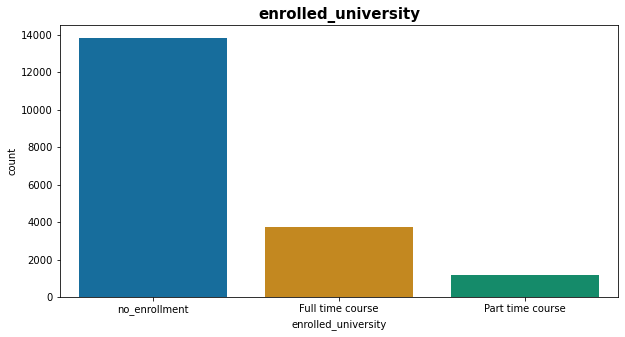

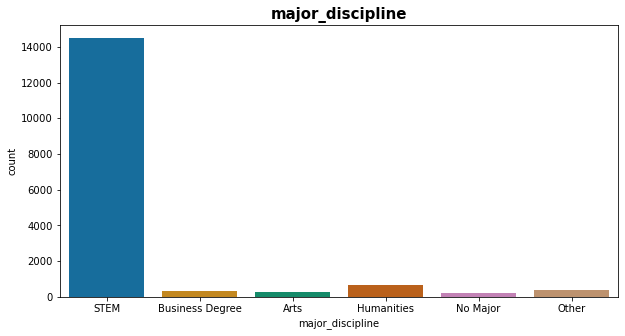

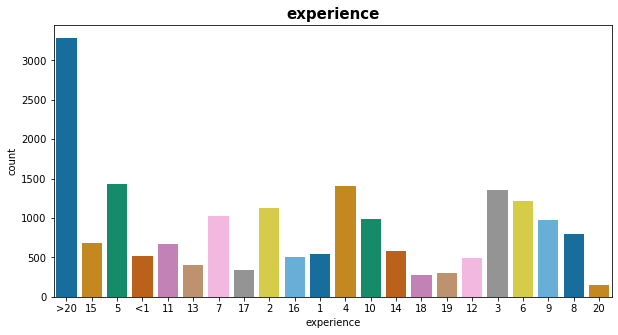

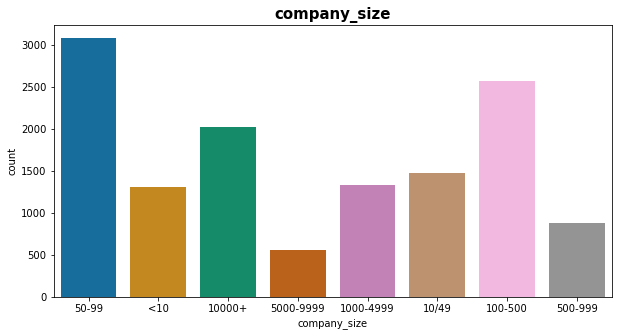

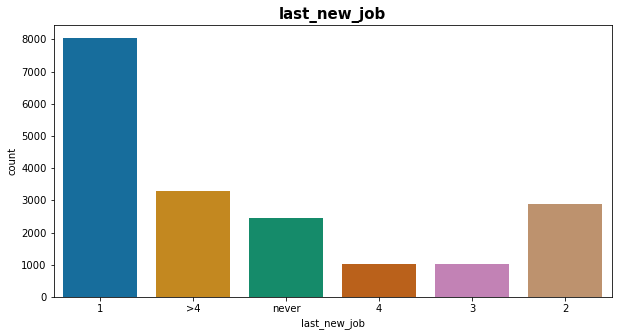

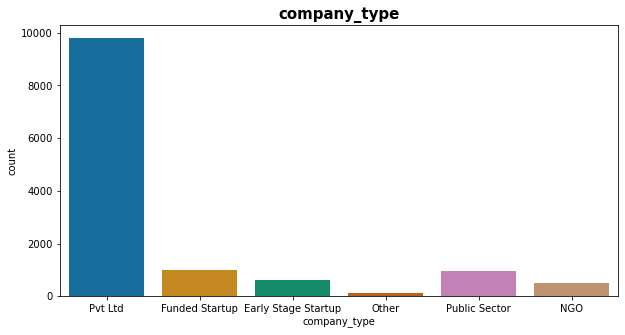

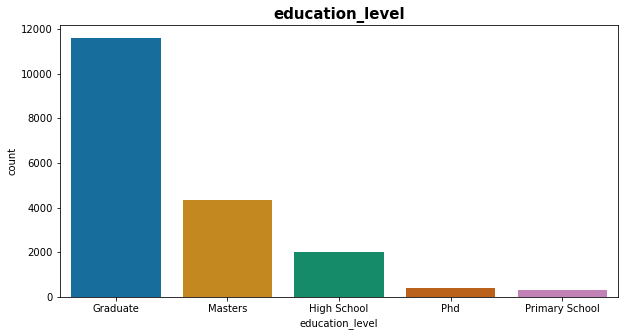

In [26]:
cols_with_data = dataset[['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'last_new_job', 'company_type', 'education_level']]   
colorblind_palette = sns.color_palette("colorblind")

for i in cols_with_data:
    plt.figure(figsize=(10,5)) 
    plt.title(i, fontsize=15, fontweight='bold', fontname='TimesNewRoman', ha='center')
    sns.countplot(data = dataset[i], x = cols_with_data[i], palette=colorblind_palette)
    plt.show()

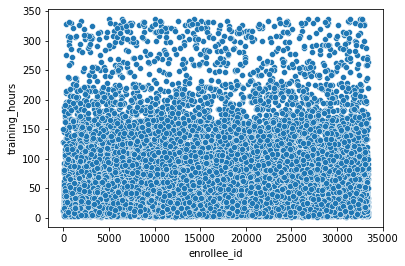

In [27]:
sns.scatterplot(x=dataset['enrollee_id'], y=dataset['training_hours'], data=dataset)
plt.xlabel('enrollee_id')
plt.ylabel('training_hours')
plt.show()

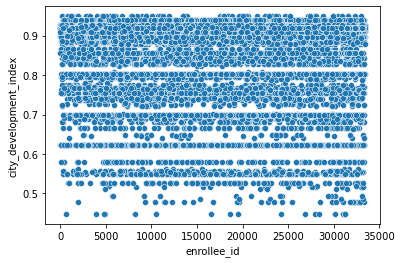

In [28]:
sns.scatterplot(x=dataset['enrollee_id'], y=dataset['city_development_index'], data=dataset)
plt.xlabel('enrollee_id')
plt.ylabel('city_development_index')
plt.show()

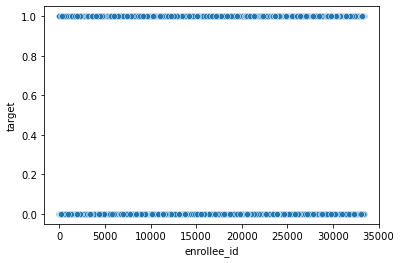

In [29]:
sns.scatterplot(x=dataset['enrollee_id'], y=dataset['target'], data=dataset)
plt.xlabel('enrollee_id')
plt.ylabel('target')
plt.show()

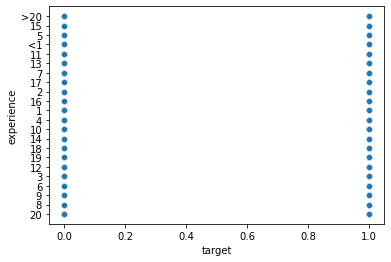

<Figure size 1440x720 with 0 Axes>

In [30]:
sns.scatterplot(x='target', y='experience', data=dataset)
plt.figure(figsize=(20,10))
plt.show()

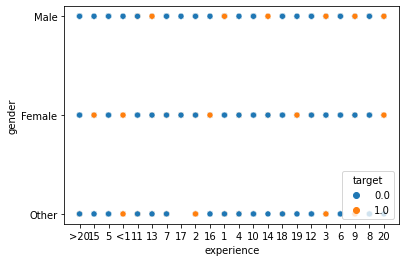

<Figure size 1080x576 with 0 Axes>

In [31]:
sns.scatterplot(x='experience', y='gender', data=dataset, hue='target')
plt.figure(figsize=(15,8))
plt.show()

In [32]:
fig = px.bar(dataset, x='experience', y='gender', color='target')
fig.show()

In [33]:
fig = px.histogram(dataset, x='gender', color='target')
fig.show()

In [34]:
fig = px.histogram(dataset, x='education_level', color='target')
fig.show()

In [35]:
fig = px.histogram(dataset, x='experience', color='target')
fig.show()

# Data Preprocessing

## Data Cleaning

### Missing Value

In [36]:
test = pd.read_csv('aug_test.csv')
train = pd.read_csv('aug_train.csv')

In [37]:
df = pd.concat([test.assign(indic="test"), train.assign(indic="train")])

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
df.isnull()

enrollee_id   city  city_development_index  gender  \
0            False  False                   False   False   
1            False  False                   False   False   
2            False  False                   False   False   
3            False  False                   False   False   
4            False  False                   False   False   
...            ...    ...                     ...     ...   
19153        False  False                   False   False   
19154        False  False                   False   False   
19155        False  False                   False   False   
19156        False  False                   False   False   
19157        False  False                   False    True   

       relevent_experience  enrolled_university  education_level  \
0                    False                False            False   
1                    False                False            False   
2                    False                False            False   
3                    False                False            False   
4                    False                False            False   
...                    ...                  ...              ...   
19153                False                False            False   
19154                False                False            False   
19155                False                False            False   
19156                False                False            False   
19157                False                False            False   

       major_discipline  experience  company_size  company_type  last_new_job  \
0                 False       False         False          True         False   
1                 False       False          True         False         False   
2                  True       False          True         False         False   
3                 False       False         False         False         False   
4                 False       False         False         False         False   
...                 ...         ...           ...           ...           ...   
19153             False       False          True          True         False   
19154             False       False          True          True         False   
19155             False       False         False         False         False   
19156              True       False         False         False         False   
19157              True       False          True          True         False   

       training_hours  indic  target  
0               False  False    True  
1               False  False    True  
2               False  False    True  
3               False  False    True  
4               False  False    True  
...               ...    ...     ...  
19153           False  False   False  
19154           False  False   False  
19155           False  False   False  
19156           False  False   False  
19157           False  False   False  

[21287 rows x 15 columns]

In [40]:
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
indic                        0
target                    2129
dtype: int64


In [41]:
df.mean()

enrollee_id               16873.983652
city_development_index        0.828462
training_hours               65.328510
target                        0.249348
dtype: float64

In [42]:
 df.fillna(df.mean())

enrollee_id      city  city_development_index  gender  \
0            32403   city_41                   0.827    Male   
1             9858  city_103                   0.920  Female   
2            31806   city_21                   0.624    Male   
3            27385   city_13                   0.827    Male   
4            27724  city_103                   0.920    Male   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878    Male   
19154        31398  city_103                   0.920    Male   
19155        24576  city_103                   0.920    Male   
19156         5756   city_65                   0.802    Male   
19157        23834   city_67                   0.855     NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience    Full time course        Graduate   
1      Has relevent experience       no_enrollment        Graduate   
2       No relevent experience       no_enrollment     High School   
3      Has relevent experience       no_enrollment         Masters   
4      Has relevent experience       no_enrollment        Graduate   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size company_type last_new_job  \
0                 STEM          9          <10          NaN            1   
1                 STEM          5          NaN      Pvt Ltd            1   
2                  NaN         <1          NaN      Pvt Ltd        never   
3                 STEM         11        10/49      Pvt Ltd            1   
4                 STEM        >20       10000+      Pvt Ltd           >4   
...                ...        ...          ...          ...          ...   
19153       Humanities         14          NaN          NaN            1   
19154             STEM         14          NaN          NaN            4   
19155             STEM        >20        50-99      Pvt Ltd            4   
19156              NaN         <1      500-999      Pvt Ltd            2   
19157              NaN          2          NaN          NaN            1   

       training_hours  indic    target  
0                  21   test  0.249348  
1                  98   test  0.249348  
2                  15   test  0.249348  
3                  39   test  0.249348  
4                  72   test  0.249348  
...               ...    ...       ...  
19153              42  train  1.000000  
19154              52  train  1.000000  
19155              44  train  0.000000  
19156              97  train  0.000000  
19157             127  train  0.000000  

[21287 rows x 15 columns]

In [43]:
import pandas as pd 
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
print(pd.DataFrame(imp.fit_transform(df), columns=df.columns, index=df.index))

      enrollee_id      city city_development_index  gender  \
0           32403   city_41                  0.827    Male   
1            9858  city_103                   0.92  Female   
2           31806   city_21                  0.624    Male   
3           27385   city_13                  0.827    Male   
4           27724  city_103                   0.92    Male   
...           ...       ...                    ...     ...   
19153        7386  city_173                  0.878    Male   
19154       31398  city_103                   0.92    Male   
19155       24576  city_103                   0.92    Male   
19156        5756   city_65                  0.802    Male   
19157       23834   city_67                  0.855    Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience    Full time course        Graduate   
1      Has relevent experience       no_enrollment        Graduate   
2       No relevent experience       no_enrol

In [44]:
df2=pd.DataFrame(imp.fit_transform(df), columns=df.columns, index=df.index)

In [45]:
print(df2)

      enrollee_id      city city_development_index  gender  \
0           32403   city_41                  0.827    Male   
1            9858  city_103                   0.92  Female   
2           31806   city_21                  0.624    Male   
3           27385   city_13                  0.827    Male   
4           27724  city_103                   0.92    Male   
...           ...       ...                    ...     ...   
19153        7386  city_173                  0.878    Male   
19154       31398  city_103                   0.92    Male   
19155       24576  city_103                   0.92    Male   
19156        5756   city_65                  0.802    Male   
19157       23834   city_67                  0.855    Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience    Full time course        Graduate   
1      Has relevent experience       no_enrollment        Graduate   
2       No relevent experience       no_enrol

### Outlier Detection

#### Detect outliers using Percentile

In [46]:
df2.describe()

enrollee_id      city  city_development_index gender  \
count         21287     21287                21287.00  21287   
unique        21287       123                   93.00      3   
top               1  city_103                    0.92   Male   
freq              1      4828                 5786.00  19697   

            relevent_experience enrolled_university education_level  \
count                     21287               21287           21287   
unique                        2                   3               5   
top     Has relevent experience       no_enrollment        Graduate   
freq                      15316               15753           13379   

       major_discipline experience company_size company_type last_new_job  \
count             21287      21287        21287        21287        21287   
unique                6         22            8            6            6   
top                STEM        >20        50-99      Pvt Ltd            1   
freq              19238       3739         9981        17732         9387   

        training_hours  indic   target  
count            21287  21287  21287.0  
unique             241      2      2.0  
top                 28  train      0.0  
freq               354  19158  16510.0

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
pd.options.mode.chained_assignment = None
ordinal_atributes = ['education_level', 'experience', 'company_size', 'last_new_job']

cardinal_atributes = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']

ordinal_pipeline = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder(categories=[
                                    ['Unknown', 'Primary School',  'High School', 'Graduate', 'Masters', 'Phd'],
                                    'Unknown,<1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,>20'.split(','),
                                    ['Unknown','<10', '10/49', '50-99', '100-500', '500-999' ,'1000-4999', '5000-9999', '10000+'],
                                    ['Unknown','1', '2', '3', '4', '>4', 'never']
                                ]))
])

ordinal_pipeline.fit(df2[ordinal_atributes])
df2[ordinal_atributes] = ordinal_pipeline.transform(df2[ordinal_atributes])
data = pd.get_dummies(df2, columns=cardinal_atributes)
data.head()
#print(data)

enrollee_id      city city_development_index education_level experience  \
0       32403   city_41                  0.827             3.0       10.0   
1        9858  city_103                   0.92             3.0        6.0   
2       31806   city_21                  0.624             2.0        1.0   
3       27385   city_13                  0.827             4.0       12.0   
4       27724  city_103                   0.92             3.0       22.0   

  company_size last_new_job training_hours indic target  ...  \
0          1.0          1.0             21  test    0.0  ...   
1          3.0          1.0             98  test    0.0  ...   
2          3.0          6.0             15  test    0.0  ...   
3          2.0          1.0             39  test    0.0  ...   
4          8.0          5.0             72  test    0.0  ...   

   major_discipline_Humanities  major_discipline_No Major  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   major_discipline_Other  major_discipline_STEM  \
0                       0                      1   
1                       0                      1   
2                       0                      1   
3                       0                      1   
4                       0                      1   

   company_type_Early Stage Startup  company_type_Funded Startup  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   company_type_NGO  company_type_Other  company_type_Public Sector  \
0                 0                   0                           0   
1                 0                   0                           0   
2                 0                   0                           0   
3                 0                   0                           0   
4                 0                   0                           0   

   company_type_Pvt Ltd  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 30 columns]

enrollee_id                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
city_development_index    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education_level           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
experience                   AxesSubplot(0.125,0.391471;0.227941x0.222059)
company_size              AxesSubplot(0.398529,0.391471;0.227941x0.222059)
last_new_job              AxesSubplot(0.672059,0.391471;0.227941x0.222059)
training_hours                  AxesSubplot(0.125,0.125;0.227941x0.222059)
target                       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

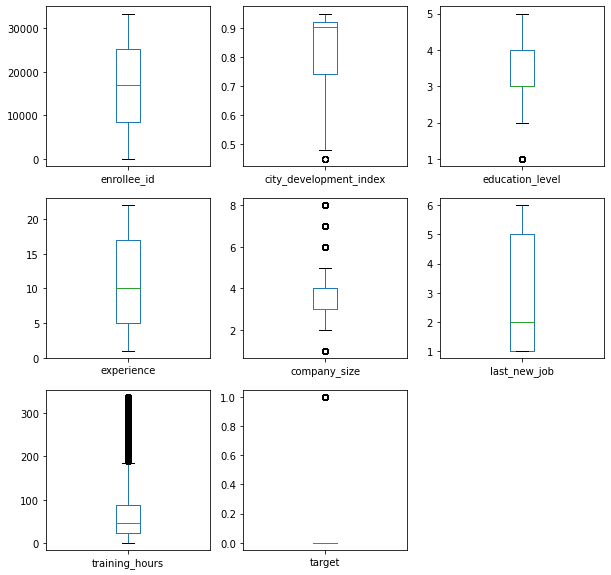

In [48]:
df2.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

In [49]:
max_thresold = df2['training_hours'].quantile(0.95)
max_thresold

190.0

In [50]:
df2[df2['training_hours']>max_thresold]

enrollee_id      city city_development_index gender  \
10          10856  city_103                   0.92   Male   
46           6312  city_160                   0.92   Male   
72           3214   city_16                   0.91   Male   
93           8488  city_101                  0.558   Male   
95           2934   city_75                  0.939   Male   
...           ...       ...                    ...    ...   
19082       22375  city_101                  0.558   Male   
19100       16368   city_65                  0.802   Male   
19107       15133  city_160                   0.92   Male   
19117        3458  city_114                  0.926   Male   
19118       12211  city_126                  0.479   Male   

           relevent_experience enrolled_university education_level  \
10     Has relevent experience       no_enrollment             4.0   
46     Has relevent experience       no_enrollment             3.0   
72     Has relevent experience       no_enrollment             4.0   
93     Has relevent experience    Part time course             4.0   
95     Has relevent experience       no_enrollment             5.0   
...                        ...                 ...             ...   
19082  Has relevent experience       no_enrollment             3.0   
19100   No relevent experience       no_enrollment             3.0   
19107   No relevent experience    Part time course             3.0   
19117  Has relevent experience       no_enrollment             4.0   
19118   No relevent experience       no_enrollment             3.0   

      major_discipline experience company_size company_type last_new_job  \
10               Other       22.0          3.0      Pvt Ltd          5.0   
46                STEM       22.0          3.0      Pvt Ltd          1.0   
72                STEM       22.0          6.0      Pvt Ltd          4.0   
93                STEM        4.0          3.0      Pvt Ltd          2.0   
95                STEM       22.0          6.0      Pvt Ltd          3.0   
...                ...        ...          ...          ...          ...   
19082             STEM       22.0          3.0      Pvt Ltd          1.0   
19100             STEM        5.0          3.0      Pvt Ltd          2.0   
19107             STEM        4.0          3.0      Pvt Ltd          1.0   
19117             STEM       22.0          3.0      Pvt Ltd          5.0   
19118             STEM        2.0          3.0      Pvt Ltd          6.0   

      training_hours  indic target  
10               196   test    0.0  
46               270   test    0.0  
72               282   test    0.0  
93               258   test    0.0  
95               328   test    0.0  
...              ...    ...    ...  
19082            266  train    1.0  
19100            304  train    0.0  
19107            322  train    1.0  
19117            214  train    0.0  
19118            316  train    1.0  

[1050 rows x 15 columns]

In [51]:
min_thresold = df2['training_hours'].quantile(0.05)
min_thresold

7.0

In [52]:
df2[df2['training_hours']<min_thresold]

enrollee_id      city city_development_index gender  \
8           12994  city_173                  0.878   Male   
9           16287   city_21                  0.624   Male   
16           7865   city_21                  0.624   Male   
43          22753  city_104                  0.924   Male   
104         20453   city_27                  0.848   Male   
...           ...       ...                    ...    ...   
19013       17245   city_64                  0.666   Male   
19036       20685   city_24                  0.698   Male   
19066       17023   city_16                   0.91   Male   
19121        1940   city_10                  0.895   Male   
19136       23672   city_21                  0.624   Male   

           relevent_experience enrolled_university education_level  \
8      Has relevent experience       no_enrollment             3.0   
9      Has relevent experience    Full time course             3.0   
16     Has relevent experience       no_enrollment             4.0   
43     Has relevent experience       no_enrollment             3.0   
104    Has relevent experience       no_enrollment             3.0   
...                        ...                 ...             ...   
19013  Has relevent experience       no_enrollment             3.0   
19036   No relevent experience    Full time course             2.0   
19066  Has relevent experience       no_enrollment             3.0   
19121  Has relevent experience       no_enrollment             4.0   
19136  Has relevent experience       no_enrollment             4.0   

      major_discipline experience company_size    company_type last_new_job  \
8                 STEM       15.0          3.0         Pvt Ltd          4.0   
9                 STEM        4.0          3.0  Funded Startup          1.0   
16                STEM        5.0          4.0         Pvt Ltd          1.0   
43                STEM       22.0          3.0         Pvt Ltd          2.0   
104               STEM        4.0          3.0         Pvt Ltd          6.0   
...                ...        ...          ...             ...          ...   
19013             STEM       11.0          1.0         Pvt Ltd          2.0   
19036             STEM       10.0          3.0         Pvt Ltd          6.0   
19066         No Major       22.0          4.0         Pvt Ltd          1.0   
19121             STEM       22.0          4.0         Pvt Ltd          1.0   
19136             STEM        7.0          3.0         Pvt Ltd          1.0   

      training_hours  indic target  
8                  2   test    0.0  
9                  4   test    0.0  
16                 4   test    0.0  
43                 3   test    0.0  
104                4   test    0.0  
...              ...    ...    ...  
19013              6  train    0.0  
19036              4  train    0.0  
19066              6  train    0.0  
19121              4  train    0.0  
19136              5  train    1.0  

[900 rows x 15 columns]

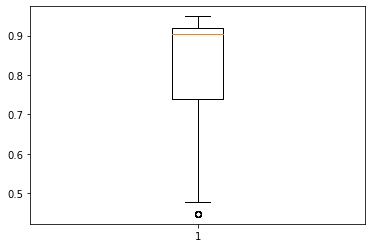

In [53]:
plt.boxplot(df2["city_development_index"])
plt.show()

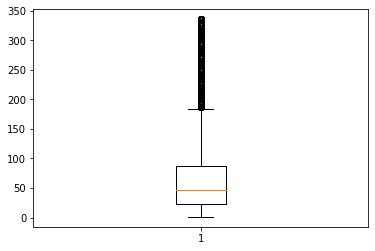

In [54]:
plt.boxplot(df2["training_hours"])
plt.show()

<AxesSubplot:title={'center':'training_hours'}, xlabel='target'>

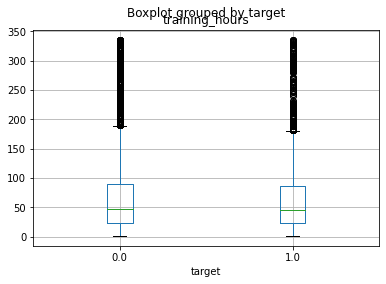

In [55]:
df2.boxplot(column='training_hours', by='target')

In [56]:
df2[(df2['training_hours']<max_thresold) & (df2['training_hours']>min_thresold)]

enrollee_id      city city_development_index  gender  \
0           32403   city_41                  0.827    Male   
1            9858  city_103                   0.92  Female   
2           31806   city_21                  0.624    Male   
3           27385   city_13                  0.827    Male   
4           27724  city_103                   0.92    Male   
...           ...       ...                    ...     ...   
19153        7386  city_173                  0.878    Male   
19154       31398  city_103                   0.92    Male   
19155       24576  city_103                   0.92    Male   
19156        5756   city_65                  0.802    Male   
19157       23834   city_67                  0.855    Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience    Full time course             3.0   
1      Has relevent experience       no_enrollment             3.0   
2       No relevent experience       no_enrollment             2.0   
3      Has relevent experience       no_enrollment             4.0   
4      Has relevent experience       no_enrollment             3.0   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment             3.0   
19154  Has relevent experience       no_enrollment             3.0   
19155  Has relevent experience       no_enrollment             3.0   
19156  Has relevent experience       no_enrollment             2.0   
19157   No relevent experience       no_enrollment             1.0   

      major_discipline experience company_size company_type last_new_job  \
0                 STEM       10.0          1.0      Pvt Ltd          1.0   
1                 STEM        6.0          3.0      Pvt Ltd          1.0   
2                 STEM        1.0          3.0      Pvt Ltd          6.0   
3                 STEM       12.0          2.0      Pvt Ltd          1.0   
4                 STEM       22.0          8.0      Pvt Ltd          5.0   
...                ...        ...          ...          ...          ...   
19153       Humanities       15.0          3.0      Pvt Ltd          1.0   
19154             STEM       15.0          3.0      Pvt Ltd          4.0   
19155             STEM       22.0          3.0      Pvt Ltd          4.0   
19156             STEM        1.0          5.0      Pvt Ltd          2.0   
19157             STEM        3.0          3.0      Pvt Ltd          1.0   

      training_hours  indic target  
0                 21   test    0.0  
1                 98   test    0.0  
2                 15   test    0.0  
3                 39   test    0.0  
4                 72   test    0.0  
...              ...    ...    ...  
19153             42  train    1.0  
19154             52  train    1.0  
19155             44  train    0.0  
19156             97  train    0.0  
19157            127  train    0.0  

[19079 rows x 15 columns]

In [57]:
df3 = df2[(df2['training_hours']<max_thresold) & (df2['training_hours']>min_thresold)]
print(df3)

      enrollee_id      city city_development_index  gender  \
0           32403   city_41                  0.827    Male   
1            9858  city_103                   0.92  Female   
2           31806   city_21                  0.624    Male   
3           27385   city_13                  0.827    Male   
4           27724  city_103                   0.92    Male   
...           ...       ...                    ...     ...   
19153        7386  city_173                  0.878    Male   
19154       31398  city_103                   0.92    Male   
19155       24576  city_103                   0.92    Male   
19156        5756   city_65                  0.802    Male   
19157       23834   city_67                  0.855    Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience    Full time course             3.0   
1      Has relevent experience       no_enrollment             3.0   
2       No relevent experience       no_enrol

In [58]:
df3.shape

(19079, 15)

In [59]:
df3.describe()

enrollee_id      city  city_development_index gender  \
count         19079     19079                19079.00  19079   
unique        19079       123                   93.00      3   
top               1  city_103                    0.92   Male   
freq              1      4333                 5201.00  17657   

            relevent_experience enrolled_university  education_level  \
count                     19079               19079          19079.0   
unique                        2                   3              5.0   
top     Has relevent experience       no_enrollment              3.0   
freq                      13713               14138          11961.0   

       major_discipline  experience  company_size company_type  last_new_job  \
count             19079     19079.0       19079.0        19079       19079.0   
unique                6        22.0           8.0            6           6.0   
top                STEM        22.0           3.0      Pvt Ltd           1.0   
freq              17220      3359.0        8964.0        15912        8391.0   

        training_hours  indic   target  
count            19079  19079  19079.0  
unique             166      2      2.0  
top                 28  train      0.0  
freq               354  17176  14756.0

<AxesSubplot:title={'center':'training_hours'}, xlabel='target'>

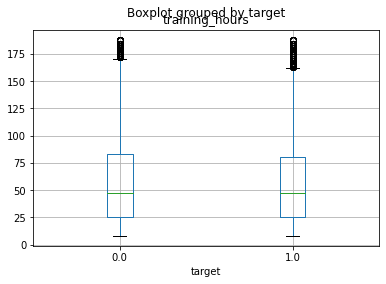

In [60]:
df3.boxplot(column='training_hours', by= 'target')

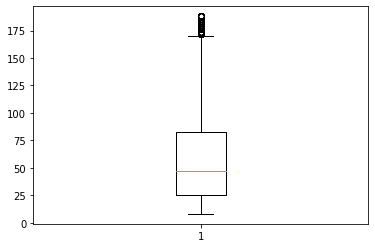

In [61]:
plt.boxplot(df3["training_hours"])
plt.show()

In [62]:
df2.shape

(21287, 15)

## Data Transformation

### Normalization

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

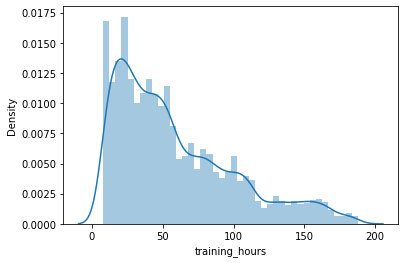

In [63]:
sns.distplot(df3['training_hours'])

<AxesSubplot:xlabel='target', ylabel='Density'>

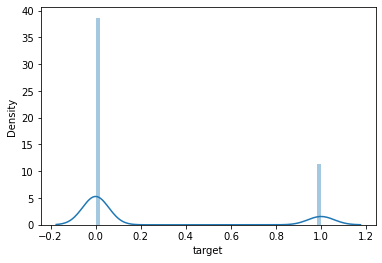

In [64]:
sns.distplot(df3['target'])

In [65]:
X_Data = df3[['city_development_index', 'training_hours']]
Y_Data = df3['target']

#### Method1: Lambda  

In [66]:
X_Data = X_Data.apply(lambda x: (x -x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
df3[['city_development_index', 'training_hours']] = X_Data
X_Data

city_development_index training_hours
0                   0.756487       0.072222
1                   0.942116            0.5
2                   0.351297       0.038889
3                   0.756487       0.172222
4                   0.942116       0.355556
...                      ...            ...
19153               0.858283       0.188889
19154               0.942116       0.244444
19155               0.942116            0.2
19156               0.706587       0.494444
19157               0.812375       0.661111

[19079 rows x 2 columns]

#### Method2: MinMaxScalar    

In [67]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_Data)
New_Data = scalar.transform(X_Data)

New_Data

array([[0.75648703, 0.07222222],
       [0.94211577, 0.5       ],
       [0.35129741, 0.03888889],
       ...,
       [0.94211577, 0.2       ],
       [0.70658683, 0.49444444],
       [0.81237525, 0.66111111]])

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

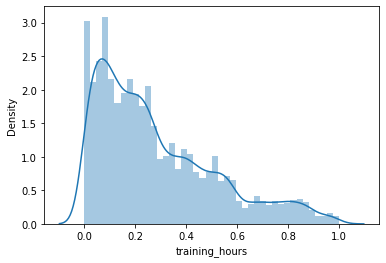

In [68]:
sns.distplot(X_Data['training_hours'])

### Feature Selection 

In [69]:
df_dummies = pd.get_dummies(df3, prefix='', prefix_sep='', 
                            columns=['city', 'gender', 'relevent_experience', 'enrolled_university', 
                                     'education_level', 'major_discipline', 'experience', 'company_size', 
                                     'company_type', 'last_new_job', 'indic'])

df_dummies.head()
#print(df_dummies)

enrollee_id city_development_index training_hours target  city_1  city_10  \
0       32403               0.756487       0.072222    0.0       0        0   
1        9858               0.942116            0.5    0.0       0        0   
2       31806               0.351297       0.038889    0.0       0        0   
3       27385               0.756487       0.172222    0.0       0        0   
4       27724               0.942116       0.355556    0.0       0        0   

   city_100  city_101  city_102  city_103  ...  Public Sector  Pvt Ltd  1.0  \
0         0         0         0         0  ...              0        1    1   
1         0         0         0         1  ...              0        1    1   
2         0         0         0         0  ...              0        1    0   
3         0         0         0         0  ...              0        1    1   
4         0         0         0         1  ...              0        1    0   

   2.0  3.0  4.0  5.0  6.0  test  train  
0    0    0    0    0    0     1      0  
1    0    0    0    0    0     1      0  
2    0    0    0    0    1     1      0  
3    0    0    0    0    0     1      0  
4    0    0    0    1    0     1      0  

[5 rows x 190 columns]

In [70]:
df_dummies

enrollee_id city_development_index training_hours target  city_1  \
0           32403               0.756487       0.072222    0.0       0   
1            9858               0.942116            0.5    0.0       0   
2           31806               0.351297       0.038889    0.0       0   
3           27385               0.756487       0.172222    0.0       0   
4           27724               0.942116       0.355556    0.0       0   
...           ...                    ...            ...    ...     ...   
19153        7386               0.858283       0.188889    1.0       0   
19154       31398               0.942116       0.244444    1.0       0   
19155       24576               0.942116            0.2    0.0       0   
19156        5756               0.706587       0.494444    0.0       0   
19157       23834               0.812375       0.661111    0.0       0   

       city_10  city_100  city_101  city_102  city_103  ...  Public Sector  \
0            0         0         0         0         0  ...              0   
1            0         0         0         0         1  ...              0   
2            0         0         0         0         0  ...              0   
3            0         0         0         0         0  ...              0   
4            0         0         0         0         1  ...              0   
...        ...       ...       ...       ...       ...  ...            ...   
19153        0         0         0         0         0  ...              0   
19154        0         0         0         0         1  ...              0   
19155        0         0         0         0         1  ...              0   
19156        0         0         0         0         0  ...              0   
19157        0         0         0         0         0  ...              0   

       Pvt Ltd  1.0  2.0  3.0  4.0  5.0  6.0  test  train  
0            1    1    0    0    0    0    0     1      0  
1            1    1    0    0    0    0    0     1      0  
2            1    0    0    0    0    0    1     1      0  
3            1    1    0    0    0    0    0     1      0  
4            1    0    0    0    0    1    0     1      0  
...        ...  ...  ...  ...  ...  ...  ...   ...    ...  
19153        1    1    0    0    0    0    0     0      1  
19154        1    0    0    0    1    0    0     0      1  
19155        1    0    0    0    1    0    0     0      1  
19156        1    0    1    0    0    0    0     0      1  
19157        1    1    0    0    0    0    0     0      1  

[19079 rows x 190 columns]

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in df3.columns:
    df3[col] = encoder.fit_transform(df3[col])

X_Data = df3[['city_development_index', 'training_hours']]
X_Data = X_Data.apply(lambda x: (x -x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
df3[['city_development_index', 'training_hours']] = X_Data
X_Data

city_development_index  training_hours
0                    0.652174        0.078788
1                    0.923913        0.539394
2                    0.152174        0.042424
3                    0.652174        0.187879
4                    0.923913        0.387879
...                       ...             ...
19153                0.771739        0.206061
19154                0.923913        0.266667
19155                0.923913        0.218182
19156                0.608696        0.533333
19157                0.728261        0.709091

[19079 rows x 2 columns]

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df3.iloc[:,0:20]  #independent columns
y = df3['target']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                     Specs          Score
0              enrollee_id  150667.506628
14                  target   14756.000000
8               experience    2362.674678
1                     city    1472.764145
2   city_development_index     270.119976
4      relevent_experience     215.486254
9             company_size     161.650919
5      enrolled_university     153.725453
13                   indic      61.769222
11            last_new_job      24.436286


[2.73526930e-03 5.65567842e-03 4.10710547e-02 8.57490417e-04
 5.66350801e-03 5.34041620e-03 2.48075534e-03 9.17186873e-04
 6.06053047e-03 5.17958818e-03 1.86397439e-03 2.18727122e-03
 2.40251909e-03 1.74017400e-02 9.00183017e-01]


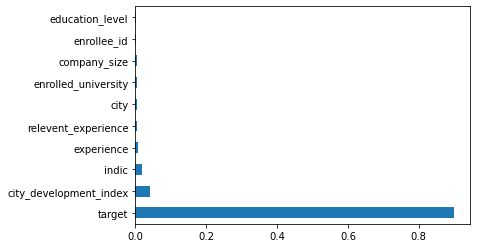

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df3.iloc[:,0:20]  
y = df3['target']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

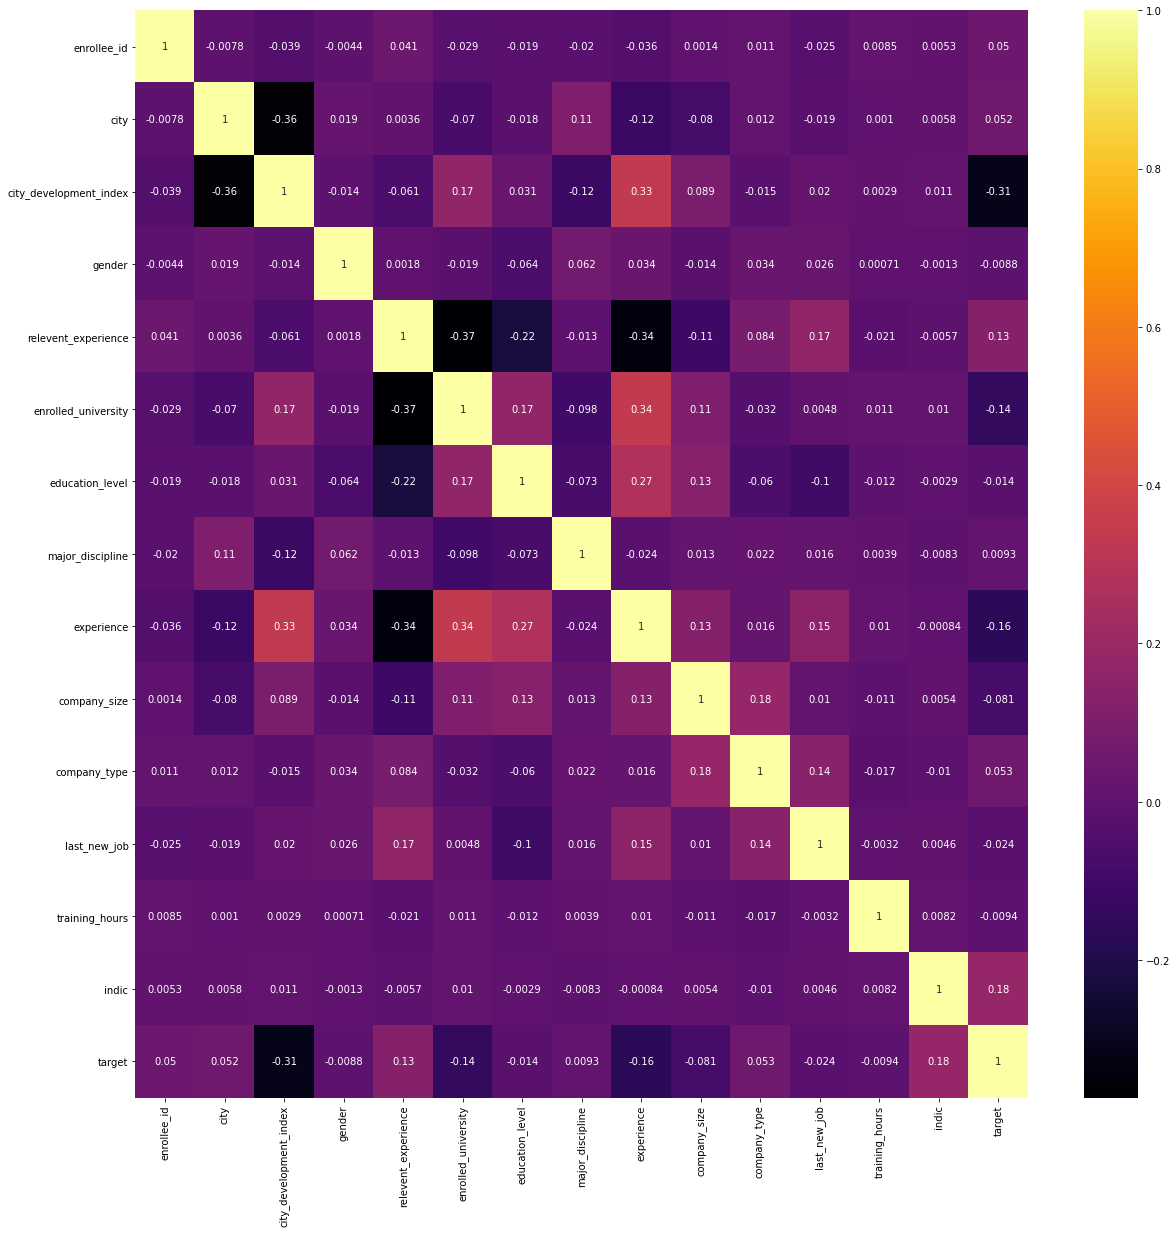

In [74]:
#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="inferno")

In [75]:
df3 = df3.drop(['major_discipline'], axis = 1)
df3

enrollee_id  city  city_development_index  gender  relevent_experience  \
0            18499    78                0.652174       1                    0   
1             5516     5                0.923913       0                    0   
2            18149    64                0.152174       1                    1   
3            15602    26                0.652174       1                    0   
4            15781     5                0.923913       1                    0   
...            ...   ...                     ...     ...                  ...   
19153         4094    55                0.771739       1                    1   
19154        17902     5                0.923913       1                    0   
19155        13967     5                0.923913       1                    0   
19156         3174    94                0.608696       1                    0   
19157        13522    95                0.728261       1                    1   

       enrolled_university  education_level  experience  company_size  \
0                        0                2           9             0   
1                        2                2           5             2   
2                        2                1           0             2   
3                        2                3          11             1   
4                        2                2          21             7   
...                    ...              ...         ...           ...   
19153                    2                2          14             2   
19154                    2                2          14             2   
19155                    2                2          21             2   
19156                    2                1           0             4   
19157                    2                0           2             2   

       company_type  last_new_job  training_hours  indic  target  
0                 5             0        0.078788      0       0  
1                 5             0        0.539394      0       0  
2                 5             5        0.042424      0       0  
3                 5             0        0.187879      0       0  
4                 5             4        0.387879      0       0  
...             ...           ...             ...    ...     ...  
19153             5             0        0.206061      1       1  
19154             5             3        0.266667      1       1  
19155             5             3        0.218182      1       0  
19156             5             1        0.533333      1       0  
19157             5             0        0.709091      1       0  

[19079 rows x 14 columns]

In [76]:
cor_target = abs(df3['target'])
df4 = cor_target[cor_target>0.5]
cor_target[cor_target>0.5] = df4
df4

0        1
3        1
5        1
7        1
8        1
        ..
19147    1
19148    1
19149    1
19153    1
19154    1
Name: target, Length: 4323, dtype: int32

In [77]:
df_dummies = pd.get_dummies(df3, prefix='', prefix_sep='', 
                            columns=['city', 'gender', 'relevent_experience', 'enrolled_university', 
                                     'education_level', 'experience', 'company_size', 'company_type',
                                     'last_new_job', 'indic'])

df_dummies.head()

enrollee_id  city_development_index  training_hours  target  0  1  2  3  4  \
0        18499                0.652174        0.078788       0  0  0  0  0  0   
1         5516                0.923913        0.539394       0  0  0  0  0  0   
2        18149                0.152174        0.042424       0  0  0  0  0  0   
3        15602                0.652174        0.187879       0  0  0  0  0  0   
4        15781                0.923913        0.387879       0  0  0  0  0  0   

   5  ...  4  5  0  1  2  3  4  5  0  1  
0  0  ...  0  1  1  0  0  0  0  0  1  0  
1  1  ...  0  1  1  0  0  0  0  0  1  0  
2  0  ...  0  1  0  0  0  0  0  1  1  0  
3  0  ...  0  1  1  0  0  0  0  0  1  0  
4  1  ...  0  1  0  0  0  0  1  0  1  0  

[5 rows x 184 columns]

### Discretization

In [78]:
df3['bucket_experience']=pd.cut(df3['experience'], 5, labels=['Beginner','Little Experienced','Experienced','High Experienced','Professional'])
df3.head(10)

enrollee_id  city  city_development_index  gender  relevent_experience  \
0         18499    78                0.652174       1                    0   
1          5516     5                0.923913       0                    0   
2         18149    64                0.152174       1                    1   
3         15602    26                0.652174       1                    0   
4         15781     5                0.923913       1                    0   
5           124    65                0.869565       1                    1   
6         12160    64                0.152174       1                    0   
7         15550    49                0.923913       0                    0   
11         5193   116                0.293478       1                    0   
12         8002    83                0.445652       1                    0   

    enrolled_university  education_level  experience  company_size  \
0                     0                2           9             0   
1                     2                2           5             2   
2                     2                1           0             2   
3                     2                3          11             1   
4                     2                2          21             7   
5                     1                3          10             2   
6                     2                2           0             3   
7                     2                2          21             2   
11                    2                2          20             1   
12                    2                2           8             3   

    company_type  last_new_job  training_hours  indic  target  \
0              5             0        0.078788      0       0   
1              5             0        0.539394      0       0   
2              5             5        0.042424      0       0   
3              5             0        0.187879      0       0   
4              5             4        0.387879      0       0   
5              5             1        0.024242      0       0   
6              5             0        0.018182      0       0   
7              5             4        0.442424      0       0   
11             5             1        0.260606      0       0   
12             3             5        0.242424      0       0   

     bucket_experience  
0          Experienced  
1   Little Experienced  
2             Beginner  
3          Experienced  
4         Professional  
5          Experienced  
6             Beginner  
7         Professional  
11        Professional  
12  Little Experienced

In [79]:
print(df3['experience'], df3['bucket_experience'])

0         9
1         5
2         0
3        11
4        21
         ..
19153    14
19154    14
19155    21
19156     0
19157     2
Name: experience, Length: 19079, dtype: int32 0               Experienced
1        Little Experienced
2                  Beginner
3               Experienced
4              Professional
                ...        
19153      High Experienced
19154      High Experienced
19155          Professional
19156              Beginner
19157              Beginner
Name: bucket_experience, Length: 19079, dtype: category
Categories (5, object): ['Beginner' < 'Little Experienced' < 'Experienced' < 'High Experienced' < 'Professional']


In [80]:
df_dummies = pd.get_dummies(df3, prefix='', prefix_sep='', 
                            columns=['city', 'gender', 'relevent_experience', 'enrolled_university', 
                                     'education_level', 'experience', 'company_size', 'company_type',
                                     'last_new_job',
                                    'bucket_experience', 'indic'])

df_dummies.head()

enrollee_id  city_development_index  training_hours  target  0  1  2  3  4  \
0        18499                0.652174        0.078788       0  0  0  0  0  0   
1         5516                0.923913        0.539394       0  0  0  0  0  0   
2        18149                0.152174        0.042424       0  0  0  0  0  0   
3        15602                0.652174        0.187879       0  0  0  0  0  0   
4        15781                0.923913        0.387879       0  0  0  0  0  0   

   5  ...  3  4  5  Beginner  Little Experienced  Experienced  \
0  0  ...  0  0  0         0                   0            1   
1  1  ...  0  0  0         0                   1            0   
2  0  ...  0  0  1         1                   0            0   
3  0  ...  0  0  0         0                   0            1   
4  1  ...  0  1  0         0                   0            0   

   High Experienced  Professional  0  1  
0                 0             0  1  0  
1                 0             0  1  0  
2                 0             0  1  0  
3                 0             0  1  0  
4                 0             1  1  0  

[5 rows x 189 columns]

## Data Reduction

### Dimensionality Reduction

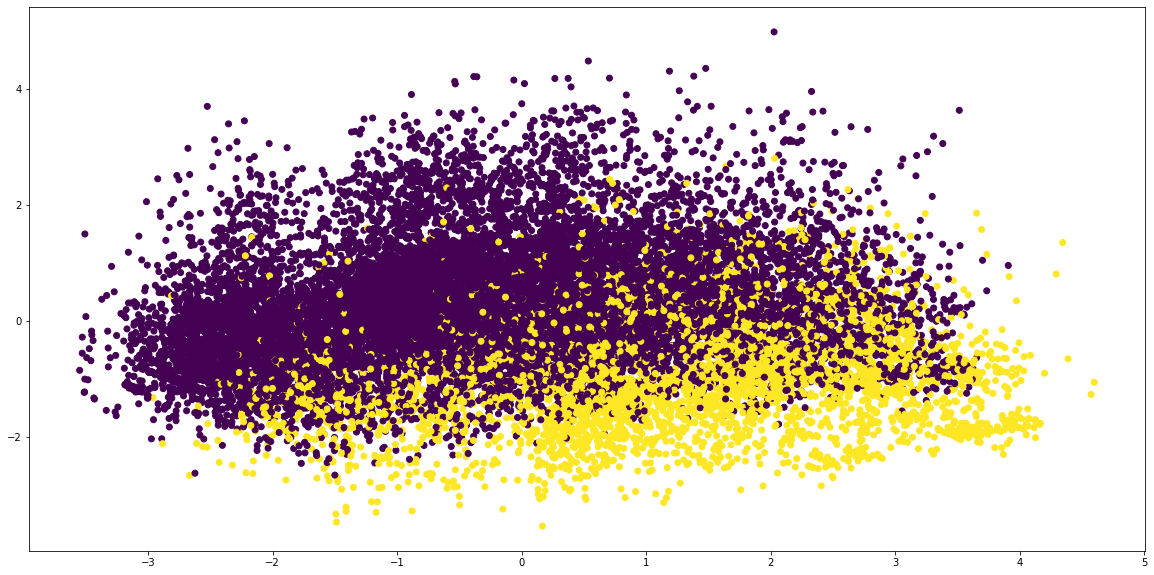

In [81]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
for col in df3.columns:
    df3[col] = encoder.fit_transform(df3[col])

X_features = df3.iloc[:,0:16] 
y_label = df3['bucket_experience']

scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

pca2 = PCA(n_components=3)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)
plt.figure(figsize=(20,10))
plt.scatter(x_3d[:,0], x_3d[:,2], c=df3['target'])
plt.show()  


In [82]:
df3.to_csv("new_dataset.1.csv")

#### Dividing of the dataset as train and test separately:

In [83]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_dummies, test_size=0.25, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 14309
No. of testing examples: 4770


In [84]:
training_data.head(10)

enrollee_id  city_development_index  training_hours  target  0  1  2  \
15914         3224                0.152174        0.284848       1  0  0  0   
3912          6091                0.923913        0.060606       1  0  0  0   
9470          2229                0.728261        0.200000       0  0  0  0   
13523         4984                0.141304        0.187879       0  0  0  0   
8954           727                0.782609        0.187879       0  0  0  0   
18741          412                0.869565        0.351515       0  0  0  0   
11169         6224                0.652174        0.393939       1  0  0  0   
5449          1248                0.293478        0.600000       0  0  0  0   
4691         15967                0.510870        0.527273       1  0  0  0   
54            1227                0.576087        0.042424       0  0  0  0   

       3  4  5  ...  3  4  5  Beginner  Little Experienced  Experienced  \
15914  0  0  0  ...  1  0  0         0                   0            1   
3912   0  0  1  ...  0  0  0         0                   0            0   
9470   0  0  0  ...  0  0  0         0                   0            1   
13523  0  0  0  ...  0  0  0         0                   1            0   
8954   0  0  0  ...  0  0  0         1                   0            0   
18741  0  0  0  ...  0  1  0         0                   0            1   
11169  0  0  0  ...  0  0  0         0                   0            1   
5449   0  0  0  ...  0  0  0         0                   0            1   
4691   0  0  0  ...  0  0  0         0                   1            0   
54     0  0  0  ...  0  0  0         0                   0            0   

       High Experienced  Professional  0  1  
15914                 0             0  0  1  
3912                  0             1  0  1  
9470                  0             0  0  1  
13523                 0             0  0  1  
8954                  0             0  0  1  
18741                 0             0  0  1  
11169                 0             0  0  1  
5449                  0             0  0  1  
4691                  0             0  0  1  
54                    1             0  1  0  

[10 rows x 189 columns]

In [85]:
training_data.to_csv("new_dataset.2.csv")

# Regression Algorithms

## Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
X = df_dummies.drop(['target'], axis=1)
y = df_dummies['target']

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [89]:
#K-fold cross-validation:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(regressor, X_test, y_test, scoring='r2', cv=folds)
scores  

array([0.14268532, 0.08212106, 0.12225837, 0.19265498, 0.15582609,
       0.14657431, 0.20672593, 0.12859613, 0.17647751, 0.19649242])

In [90]:
print(regressor.intercept_)

0.19797449519550764


In [91]:
print(regressor.coef_)

[ 1.59907783e-06 -3.02013427e-01 -1.71571663e-02 -1.65617905e-01
 -2.76862980e-02  7.09770207e-02  1.55325951e-01  2.43174984e-03
  1.19738107e-01 -4.39661937e-03 -7.02231366e-02  7.56805189e-02
  8.71149734e-02 -2.18939337e-01  1.90192321e-01 -4.09739984e-01
  3.98918933e-02  1.19526281e-01 -5.04018187e-02 -2.33322741e-02
  8.45517160e-02 -2.01789462e-01 -6.94559063e-02 -2.83225112e-02
  3.11027968e-03  1.21203086e-01 -1.37975934e-01  1.15541332e-01
 -3.57700603e-01 -4.85352406e-02  1.45238675e-01 -1.97612642e-01
 -1.00525334e-02 -3.36267222e-02 -7.62000010e-02  2.45101939e-01
 -5.11953682e-02 -1.64006081e-01 -1.59627195e-01  2.99419494e-02
  6.36853428e-02  3.31652784e-02  1.12010344e-01  7.39637839e-02
 -8.34468298e-02 -3.13794523e-02 -1.15763905e-01  3.81670006e-01
 -1.39013713e-01  5.78712705e-02  2.65815452e-02  2.73648681e-02
  1.33989705e-01  7.93256035e-02  1.04447801e-01 -3.73068388e-02
  2.08183383e-01 -1.17217440e-01  2.87389373e-02 -7.52139045e-02
 -3.08409801e-02  3.49269

In [92]:
y_pred = regressor.predict(X_test)
y_pred

array([0.04909676, 0.04204502, 0.22243495, ..., 0.03312712, 0.05544292,
       0.14490888])

In [93]:
lin_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lin_pred

Actual  Predicted
5388        0   0.049097
2820        0   0.042045
478         0   0.222435
10540       0   0.183547
11849       1   0.265088
...       ...        ...
12896       0   0.190644
6146        1   0.267809
1930        0   0.033127
14739       0   0.055443
7344        1   0.144909

[4770 rows x 2 columns]

In [94]:
print('Linear Regression model accuracy: {:.2f}'.format(regressor.score(X_test, y_test)))

Linear Regression model accuracy: 0.19


In [95]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2930377852920452
Mean Squared Error: 0.1397057068926178
Root Mean Squared Error: 0.37377226608272823
R^2 Score: 0.18508323257497106


## Lasso Regression 

In [96]:
X = training_data.drop(['target'], axis=1)
y = training_data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.08768667, -1.24576911, -0.93062947, ..., -0.55470865,
        -0.32776568,  0.32776568],
       [ 0.15944055, -1.69276871,  0.30370553, ..., -0.55470865,
        -0.32776568,  0.32776568],
       [ 0.59050804,  0.95484431,  1.26648683, ..., -0.55470865,
        -0.32776568,  0.32776568],
       ...,
       [-0.51693657, -0.24861615, -0.70844917, ..., -0.55470865,
         3.05096007, -3.05096007],
       [ 1.70778689, -1.69276871,  1.78490753, ..., -0.55470865,
        -0.32776568,  0.32776568],
       [-0.04580366, -0.62684659, -1.20218317, ..., -0.55470865,
        -0.32776568,  0.32776568]])

In [98]:
from sklearn.linear_model import LassoCV
# for the best result
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter=10000)
model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, random_state=0)

In [99]:
model.alpha_

0.003001933611391598

In [100]:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.003001933611391598)

In [101]:
#K-fold cross-validation:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lasso_best, X_test, y_test, scoring='r2', cv=folds)
scores  

array([0.13503584, 0.15236926, 0.20985538, 0.15281668, 0.20711393,
       0.11039607, 0.19602433, 0.23302238, 0.13554272, 0.2151039 ])

In [102]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 21.45
R squared test set 19.46


In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lasso_best.predict(X_test))

0.14239443345937652

In [104]:
y_pred = lasso_best.predict(X_test)

In [105]:
print('Lasso Regression model accuracy: {:.2f}'.format(lasso_best.score(X_test, y_test)))

Lasso Regression model accuracy: 0.19


In [106]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2977004099299226
Mean Squared Error: 0.14239443345937652
Root Mean Squared Error: 0.3773518695586078
R^2 Score: 0.19463312817319878


## Support Vector Regression  

In [107]:
X = training_data.drop(['target'], axis=1)
y = training_data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.08768667, -1.24576911, -0.93062947, ..., -0.55470865,
        -0.32776568,  0.32776568],
       [ 0.15944055, -1.69276871,  0.30370553, ..., -0.55470865,
        -0.32776568,  0.32776568],
       [ 0.59050804,  0.95484431,  1.26648683, ..., -0.55470865,
        -0.32776568,  0.32776568],
       ...,
       [-0.51693657, -0.24861615, -0.70844917, ..., -0.55470865,
         3.05096007, -3.05096007],
       [ 1.70778689, -1.69276871,  1.78490753, ..., -0.55470865,
        -0.32776568,  0.32776568],
       [-0.04580366, -0.62684659, -1.20218317, ..., -0.55470865,
        -0.32776568,  0.32776568]])

In [109]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [110]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.09453579,  0.89906824,  0.40280613, ..., -0.02250763,
        0.025018  ,  0.01456812])

In [111]:
print('Support Vector Regression model accuracy: {:.2f}'.format(regressor.score(X_test, y_test)))

Support Vector Regression model accuracy: 0.11


In [112]:
#K-fold cross-validation:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(regressor, X_test, y_test, scoring='r2', cv=folds)
scores  

array([0.01176892, 0.11458526, 0.14772389, 0.06316142, 0.14901772,
       0.01300385, 0.12357945, 0.24193419, 0.06029407, 0.15442811])

In [113]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.26144364283021565
Mean Squared Error: 0.15748337819284283
Root Mean Squared Error: 0.3968417545985337
R^2 Score: 0.10929175685740156


## Decision Trees - Regression 

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
X = training_data.drop(['target'], axis=1)
y = training_data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)

In [116]:
des_regressor = DecisionTreeRegressor(random_state=0)

In [117]:
des_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [118]:
y_pred = des_regressor.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [119]:
print('Decision Tree Regression model accuracy: {:.2f}'.format(des_regressor.score(X_test, y_test)))

Decision Tree Regression model accuracy: -0.44


In [120]:
#K-fold cross-validation:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(des_regressor, X_test, y_test, scoring='r2', cv=folds)
scores  

array([-0.58308099, -0.70355713, -0.59361511, -0.7091822 , -0.55015226,
       -0.73754579, -0.49908789, -0.41309378, -0.56268051, -0.28407333])

In [121]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2546115148127446
Mean Squared Error: 0.2546115148127446
Root Mean Squared Error: 0.5045904426490305
R^2 Score: -0.4400540402748492


## Logistic Regression 

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = training_data.drop(['target'], axis=1)
y = training_data['target']
y=y.astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)

In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression model accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

Logistic Regression model accuracy: 0.80


In [124]:
#K-fold cross-validation:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(logreg, X_test, y_test, scoring='r2', cv=folds)
scores  

array([-0.11848113, -0.26501767, -0.11070144, -0.29662098,  0.04606014,
       -0.29496337, -0.3358209 ,  0.04169502, -0.17603791, -0.18742265])

In [125]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2048630519843488
Mean Squared Error: 0.2048630519843488
Root Mean Squared Error: 0.4526179978572977
R^2 Score: -0.1586823397601147


In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2578  179]
 [ 554  267]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2757
           1       0.60      0.33      0.42       821

    accuracy                           0.80      3578
   macro avg       0.71      0.63      0.65      3578
weighted avg       0.77      0.80      0.77      3578



#### SAMPLING 

In [128]:
#simple random sampling
sample_df = training_data.sample(100)

In [129]:
sample_df

enrollee_id  city_development_index  training_hours  target  0  1  2  \
7837          7698                0.793478        0.139394       0  0  0  1   
12285         1115                0.152174        0.218182       1  0  0  0   
24           12906                0.152174        0.030303       0  0  0  0   
18992         3546                0.923913        0.690909       0  0  0  0   
16402         5157                0.793478        0.024242       0  0  0  1   
...            ...                     ...             ...     ... .. .. ..   
97            6256                0.141304        0.157576       0  0  0  0   
5799          9527                0.923913        0.624242       1  0  0  0   
9952          8908                0.923913        0.254545       0  0  0  0   
14616         6592                0.978261        0.103030       0  0  0  0   
15488        12934                0.891304        0.218182       0  0  0  0   

       3  4  5  ...  3  4  5  Beginner  Little Experienced  Experienced  \
7837   0  0  0  ...  0  0  0         1                   0            0   
12285  0  0  0  ...  1  0  0         0                   1            0   
24     0  0  0  ...  0  0  0         0                   1            0   
18992  0  0  1  ...  0  0  0         0                   0            0   
16402  0  0  0  ...  0  0  0         0                   1            0   
...   .. .. ..  ... .. .. ..       ...                 ...          ...   
97     0  0  0  ...  0  0  0         1                   0            0   
5799   0  0  1  ...  0  0  0         0                   1            0   
9952   0  0  1  ...  1  0  0         0                   0            1   
14616  0  0  0  ...  0  0  1         0                   1            0   
15488  0  0  0  ...  0  0  0         0                   0            0   

       High Experienced  Professional  0  1  
7837                  0             0  0  1  
12285                 0             0  0  1  
24                    0             0  0  1  
18992                 0             1  0  1  
16402                 0             0  0  1  
...                 ...           ... .. ..  
97                    0             0  0  1  
5799                  0             0  0  1  
9952                  0             0  0  1  
14616                 0             0  0  1  
15488                 0             1  0  1  

[100 rows x 189 columns]